# Approximation of the kernel matrix.

Author: <alberto.suarez@uam.es>

In this notebook we illustrate the quality of the approximation to the kernel matrix using random features of different types (RBF, Matérn) and Nystöm features.

Note that even the best results for classification need not be obtained by the method that gives the best approximation to the kernel matrix. The reason is that the approximation can have a regularization effect that may improve the accuracy of the predictions on the test set.

In [1]:
%load_ext autoreload
%autoreload 2

## Load necessary modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import rbf_kernel
from sklearn import datasets
from sklearn.kernel_approximation import RBFSampler
from sklearn.gaussian_process.kernels import Matern
import kernel_approximation as ka

### Exercises
1. Implement the incomplete methods in *kernel_approximation.py*
2. Comment on the values of the error for the different approximations, and their dependence with the number of sampled features.
3. (Extra point) Determine de dependence of the mean error with the number of features for the different random feature models. Provide an explanation of this behavior.

### Notes
1. For the implementation of the Nyström method, the following functions are useful:
* numpy.linalg.pinv [ https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html ].
* scipy.linalg.sqrtm  [ https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.sqrtm.html ].


### Generate data

In [2]:
# 3-D data
n_instances = 1000
X, t = datasets.make_s_curve(n_instances, noise=0.1)
X = X[np.argsort(t)]

# Reshape if necessary
if (X.ndim == 1):
    X = X[:, np.newaxis]

### Random Features Sampler RBF

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


# of features =  10
# of features =  100
# of features =  1000
# of features =  10000


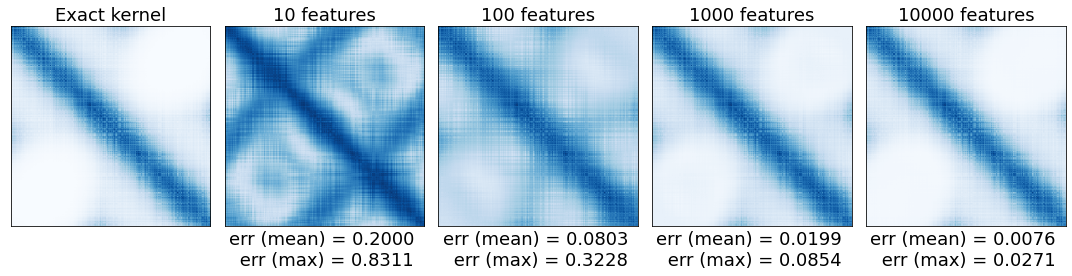

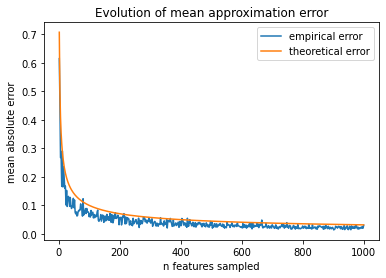

In [3]:
# RBF kernel parameters 
sigma = 1.0
gamma = 1.0 / (2.0 * sigma**2)

# Kernel function
def kernel(X, Y):
    return rbf_kernel(X, Y, gamma=gamma) 

## Create an instance of the random features object
rbf_sampler = ka.RandomFeaturesSamplerRBF(sigma)

## Plot the approximation to the kernel matrix
n_random_features = [10, 100, 1000, 10000]
ka.demo_kernel_approximation_features(
    X, 
    kernel, 
    rbf_sampler,
    n_random_features
)

## Plot the error evolution with each kernel matrix
ka.demo_kernel_approximation_error_evolution(
    X, 
    kernel, 
    rbf_sampler,
    1000
)

Se compara la matriz de Gram de los datos generados con las matrices de Gram aproximadas por random Fourier features (RFF) para distintos números de características.

En la gráfica superior se observa que 10 características no son suficientes para que la clase aproxime correctamente la matriz de Gram. Al aumentar el número de características utilizando potencias de 10, el error empieza a disminuir considerablemente, alcanzando on 10000 características, una matriz casi idendica.

En la gráfica inferior se muestra la evolución del error según aumenta el número de características eligiendolas de 2 en 2 hasta llegar a 1000. Vemos que converge a una velocidad de $O(n^{-1/2})$. 

# of features =  10
# of features =  100
# of features =  1000
# of features =  10000


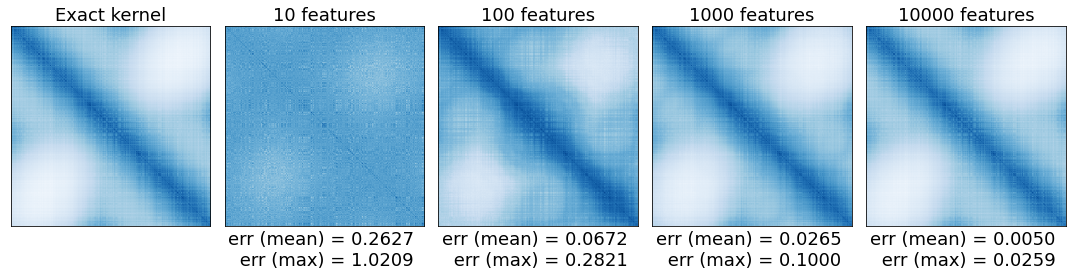

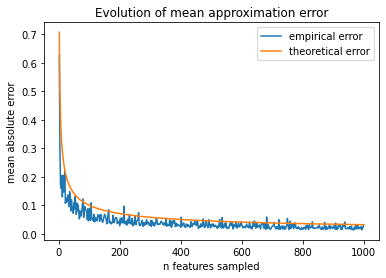

In [4]:
length_scale = 3.0
nu = 0.5

kernel_matern = Matern(length_scale=length_scale, nu=nu) 

def kernel(X, Y):
    return kernel_matern(X, Y)

matern_sampler = ka.RandomFeaturesSamplerMatern(length_scale, nu)    

n_random_features = [10, 100, 1000, 10000]

ka.demo_kernel_approximation_features(
    X, 
    kernel, 
    matern_sampler,
    n_random_features
)

ka.demo_kernel_approximation_error_evolution(
    X, 
    kernel, 
    matern_sampler,
    1000
)

Para el mismo número de características, se compara la matriz de Gram de los datos generados con las matrices de Gram aproximadas por random Fourier features utilizando el kernel Matern.

Se observa un comportamiento similar en la aproximación del kernel al obtenido con RBF. Con 10 características, la aproximación se aleja de la matriz teórica y se necesitan del orden de 1000 características para obtener una buena aproximación.

Respecto a la evolución del error con el número de características, vemos que converge a la misma velocidad $O(n^{-1/2})$.

# of features =  10
# of features =  100
# of features =  1000


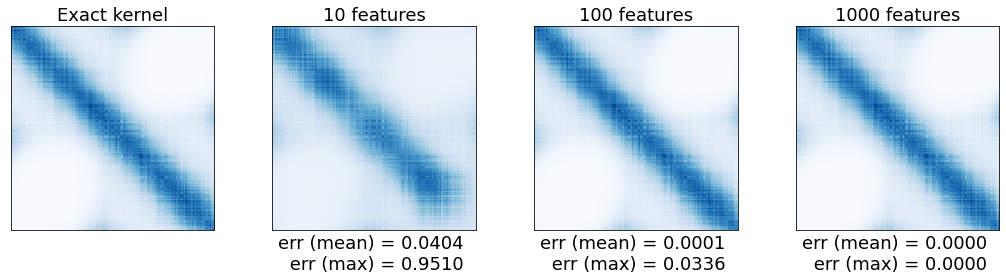

/home/maria/Escritorio/mucd-mg/mf/p2/kernel_approximation.py:216: UserWarning: Maximum imaginary part is 1.6518306004577172e-06
  warnings.warn(


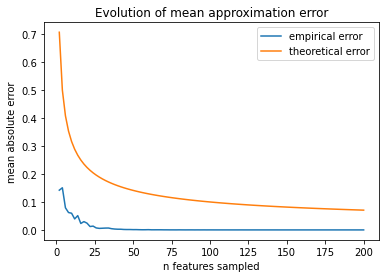

In [5]:
# Kernel parameters 
sigma = 1.0
gamma = 1.0 / (2.0 * sigma**2)

# Kernel matrix
def kernel(X, Y):
    return rbf_kernel(X, Y, gamma=gamma) 

nystroem_sampler = ka.NystroemFeaturesSampler(kernel)

n_nystroem_features = [10, 100, 1000]

ka.demo_kernel_approximation_features(
    X, 
    kernel, 
    nystroem_sampler,
    n_nystroem_features
)

ka.demo_kernel_approximation_error_evolution(
    X, 
    kernel, 
    nystroem_sampler,
    200
)

Finalmente, utilizando la aproximación de Nystroem, con 10 características ya comienza a intuirse la matriz de Gram teórica, con 100 características conseguimos representarla casi con el mismo nivel de precisión y con 1000 características, la matriz aproximada coincide con la original.

Respecto a la evolución del error, en este caso se han representado los errores de aproximación utilizando hasta 200 características ya que hemos visto que la convergencia era mucho más rápida que $O(n^{-1/2})$.